In [1]:
#%pip install numpy pandas matplotlib seaborn scikit-learn tensorflow obspy distutils obspy

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from obspy import read
import os
import sys

# Define el directorio de datos
path_to_dataset = r'C:\Users\Kono\Desktop\space_apps_2024_seismic_detection\data'
sys.path.append(path_to_dataset)
data_directory = path_to_dataset + r'\lunar\training\data\S12_GradeA'
data_files = os.listdir(data_directory)
data_files = [data_directory + '\\' + file for file in data_files if file.endswith('.mseed')]
abstract_dfs = pd.read_csv(r'C:\Users\Kono\Desktop\space_apps_2024_seismic_detection\data\lunar\training\catalogs\apollo12_catalog_GradeA_final.csv')

# Inicializa un DataFrame vacío con columnas especificadas
df = pd.DataFrame(columns=['file_name', 'start', 'id', 'cant_measurements', 'st'])

for index, file in enumerate(data_files):
    print(f'Processing file {index+1} of {len(data_files)}')
    
    # Lee el archivo .mseed
    temp_df = read(file)
    
    # Extrae el ID del evento del nombre del archivo
    evid_id = file.split('\\')[-1].split('_')[-1].split('evid')[1].split('.')[0]
    
    # Extrae el nombre del archivo sin la extensión .mseed
    file_name = file.split('\\')[-1].rstrip('.mseed')
    
    # Verifica si el nombre del archivo existe en el DataFrame abstract_dfs
    if len(abstract_dfs[abstract_dfs['filename'] == file_name]['time_rel(sec)']) == 0:
        continue  # Salta este archivo si no existe en abstract_dfs
    
    # Obtiene el tiempo de inicio del DataFrame abstract_dfs
    start = abstract_dfs[abstract_dfs['filename'] == file_name]['time_rel(sec)'].iloc[0]
    
    # Extrae la traza y los datos
    tr = temp_df.traces[0].copy()
    tr_data = tr.data  # Velocidades
    tr_times = tr.times()  # Tiempos relativos

    # Crea un diccionario temporal con la información requerida
    temp_dict = {
        'file_name': file_name, 
        'start': start,  
        'id': evid_id, 
        'cant_measurements': temp_df[0].stats.npts,
        'st': temp_df
    }

    # Agrega el diccionario temporal al DataFrame principal
    df = pd.concat([df, pd.DataFrame([temp_dict])], ignore_index=True)

df.head()

Processing file 1 of 76
Processing file 2 of 76
Processing file 3 of 76
Processing file 4 of 76
Processing file 5 of 76
Processing file 6 of 76
Processing file 7 of 76
Processing file 8 of 76
Processing file 9 of 76
Processing file 10 of 76
Processing file 11 of 76
Processing file 12 of 76
Processing file 13 of 76
Processing file 14 of 76
Processing file 15 of 76
Processing file 16 of 76
Processing file 17 of 76


C:\Users\Kono\AppData\Local\Temp\ipykernel_652\1764884676.py:55: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([temp_dict])], ignore_index=True)


Processing file 18 of 76
Processing file 19 of 76
Processing file 20 of 76
Processing file 21 of 76
Processing file 22 of 76
Processing file 23 of 76
Processing file 24 of 76
Processing file 25 of 76
Processing file 26 of 76
Processing file 27 of 76
Processing file 28 of 76
Processing file 29 of 76
Processing file 30 of 76
Processing file 31 of 76
Processing file 32 of 76
Processing file 33 of 76
Processing file 34 of 76
Processing file 35 of 76
Processing file 36 of 76
Processing file 37 of 76
Processing file 38 of 76
Processing file 39 of 76
Processing file 40 of 76
Processing file 41 of 76
Processing file 42 of 76
Processing file 43 of 76
Processing file 44 of 76
Processing file 45 of 76
Processing file 46 of 76
Processing file 47 of 76
Processing file 48 of 76
Processing file 49 of 76
Processing file 50 of 76
Processing file 51 of 76
Processing file 52 of 76
Processing file 53 of 76
Processing file 54 of 76
Processing file 55 of 76
Processing file 56 of 76
Processing file 57 of 76


,file_name,start,id,cant_measurements,st
0,xa.s12.00.mhz.1970-01-19HR00_evid00002,73500.0,00002,572415,"[(-6.153278962788711e-14, -7.70128843364098e-1..."
1,xa.s12.00.mhz.1970-03-25HR00_evid00003,12720.0,00003,572411,"[(-5.481780117043957e-15, -6.8786525555433944e..."
2,xa.s12.00.mhz.1970-03-26HR00_evid00004,73020.0,00004,572411,"[(-2.8212463353274306e-14, -3.523317065258157e..."
3,xa.s12.00.mhz.1970-04-25HR00_evid00006,4440.0,00006,572415,"[(9.01642264710853e-15, 1.1305708384819468e-14..."
4,xa.s12.00.mhz.1970-04-26HR00_evid00007,52140.0,00007,572411,"[(-1.5835653822406575e-16, -1.8729952083938931..."


In [10]:
from scipy import signal
from matplotlib import cm

def plot_seismic_data(st, start, start_prediction):
    # Filtrar la señal
    minfreq = 0.5
    maxfreq = 1.0
    st_filt = st.copy()
    st_filt.filter('bandpass',freqmin=minfreq,freqmax=maxfreq)
    tr_filt = st_filt.traces[0].copy()
    tr_times_filt = tr_filt.times()
    tr_data_filt = tr_filt.data
    
    f, t, sxx = signal.spectrogram(tr_data_filt, tr_filt.stats.sampling_rate)

    # Graficar la serie temporal y el espectrograma
    fig = plt.figure(figsize=(10, 10))
    
    ax1 = plt.subplot(2, 1, 1)
    ax1.plot(tr_times_filt, tr_data_filt)
    
    # Marcar el inicio de la predicción
    ax1.axvline(x=start_prediction, color='green', label='Predicción de inicio')
    ax1.axvline(x=start, color='red', label='Inicio real')
    
    ax1.legend(loc='upper left')
    ax1.set_xlim([min(tr_times_filt), max(tr_times_filt)])
    ax1.set_ylabel('Velocidad (m/s)')
    ax1.set_xlabel('Tiempo (s)')
    
    ax2 = plt.subplot(2, 1, 2)
    vals = ax2.pcolormesh(t, f, sxx, cmap=cm.jet, vmax=5e-17)
    ax2.set_xlim([min(tr_times_filt), max(tr_times_filt)])
    ax2.set_xlabel('Tiempo (s)', fontweight='bold')
    ax2.set_ylabel('Frecuencia (Hz)', fontweight='bold')
    
    # Marcar el inicio de la predicción en el espectrograma
    ax2.axvline(x=start_prediction, color='green')
    ax2.axvline(x=start, color='red')

    # Añadir barra de color
    cbar = plt.colorbar(vals, orientation='horizontal')
    cbar.set_label('Power ((m/s)^2/sqrt(Hz))', fontweight='bold')

    plt.tight_layout()
    plt.show()


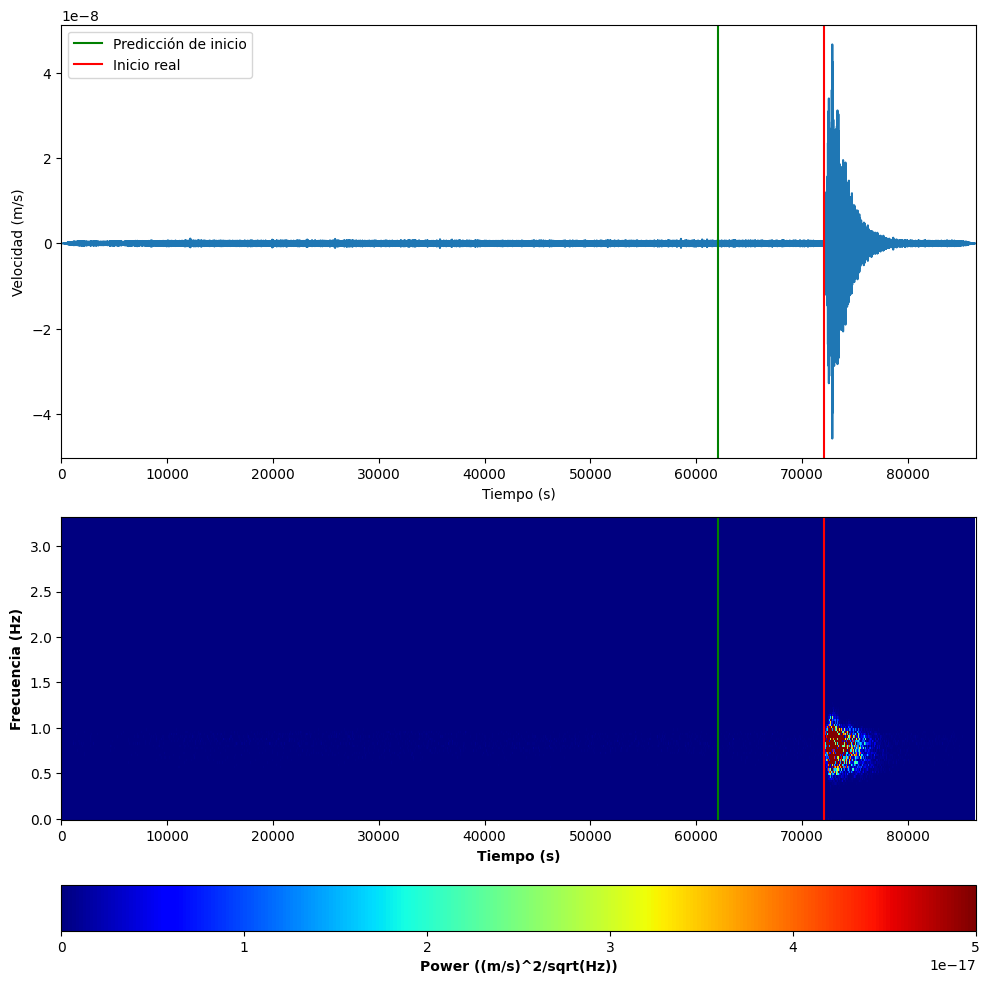

In [11]:
i = 6
plot_seismic_data(df.iloc[i]['st'], df.iloc[i]['start'], df.iloc[i]['start'] - 10000)